In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
import watermark
import numpy as np
import pandas as pd
import oclpy as ocl
import ompy as om
import matplotlib.pyplot as plt
import uproot as up
%load_ext watermark
%watermark -n -u -v -iv -w

def fwhm(E): return np.sqrt(60.6499 + 0.458252*E + 0.000265552*E**2)

Last updated: Mon Aug 07 2023

Python implementation: CPython
Python version       : 3.11.2
IPython version      : 8.12.0

watermark : 2.4.3
uproot    : 5.0.6
pandas    : 1.5.3
numpy     : 1.24.2
matplotlib: 3.7.1
ompy      : 1.1.0.dev0+76bd684
oclpy     : 0.8.0.dev0+175bcda

Watermark: 2.4.3



In [14]:
file = up.open("/Volumes/PR271/afrodite6LaBr3/energy_2500keV.root")
expr = [f"OCLLABR_Energy{i}" for i in range(6)]
data = {}
for i in range(6):
    data.update(file['DataTreeSim'].arrays(f"OCLLABR_Energy{i}", f"OCLLABR_Energy{i} > 0", library='np'))

{'OCLLABR_Energy0': array([2500.        ,  363.11056636,  359.09671607, ...,  205.08539837,
       2500.        ,  311.72927358]), 'OCLLABR_Energy1': array([ 150.74543423, 1738.55926275, 1973.85669502, ..., 1594.72682357,
        889.64958036, 1651.8993413 ]), 'OCLLABR_Energy2': array([2500.        ,   84.95936669, 2275.44899856, ..., 1581.8543722 ,
       2500.        ,   83.14589901]), 'OCLLABR_Energy3': array([1472.03555838, 1989.00109   , 2500.        , ..., 1302.28457679,
        243.89853059, 2500.        ]), 'OCLLABR_Energy4': array([ 361.80644039, 2277.45790816, 2285.49817681, ...,  204.94689179,
       2500.        , 2500.        ]), 'OCLLABR_Energy5': array([ 457.59366601, 2500.        , 2500.        , ..., 2500.        ,
       2082.55079965, 1391.17618434])}


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Energy'>)

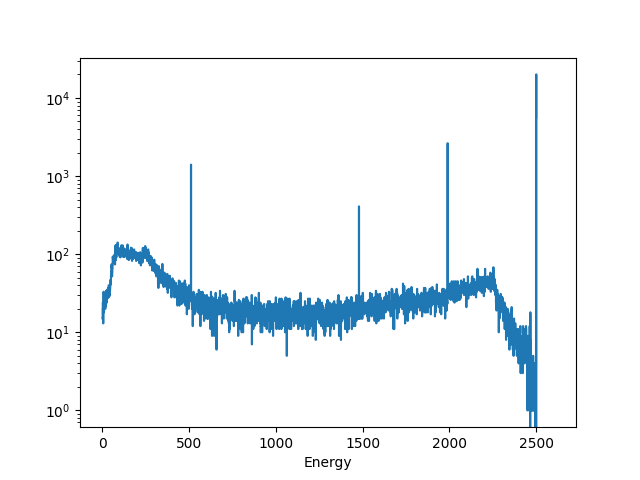

In [17]:
vecs = []
for key in data:
    vecs.append(ocl.Histogram1D(data[key], bins=2600, range=[0, 2600]))
vec_sum = vecs[0].copy()
for vec in vecs[1:]:
    vec_sum.values += vec.values
vec_sum.plot(kind='step', scale='log')